# Plots, plots, plots

We can do better than including TensorBoard screenshots, right?

In [37]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
import json

In [7]:
# Andrei's plot dumps (CSV dumps were not working in TB for some reason)

plot_root = os.path.join('..', 'data', 'plots')

CNN = os.path.join(plot_root, 'run-euler-cnn-w2v-300d-1466952510-euler-cnn-pp-hf-20-lf-4-htfb-10-mscl-5-summaries-dev-tag-accuracy.json')
LSTM_SHALLOW = os.path.join(plot_root, 'run-euler-lstm-128-35-words-w2v-300-pretrained-1466514832-summaries-dev-tag-accuracy.json')
LSTM_DEEP = os.path.join(plot_root, 'run-euler-lstm-w2v-300d-1467126384-euler-summaries-dev-tag-accuracy.json')

In [8]:
def load_json_curve(fname):
    with open(fname, 'r') as f:
        return json.loads(f.read())

In [15]:
cnn_curve = load_json_curve(CNN)
lstm_shallow_curve = load_json_curve(LSTM_SHALLOW)
lstm_deep_curve = load_json_curve(LSTM_DEEP)

In [27]:
BATCH_SIZE = 256
EPOCH_STEPS = 2500000 * 0.9 / BATCH_SIZE

print("We have {0} steps in one epoch.".format(EPOCH_STEPS))

We have 8789.0625 steps in one epoch.


In [34]:
curves = {
    'cnn': ['CNN', cnn_curve],
    'lstm_s': ['1 layer LSTM @ 128 units', lstm_shallow_curve],
    'lstm_d': ['2 layer LSTM @ 300+256 units', lstm_deep_curve]
}

In [59]:
font = {'family' : '',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)

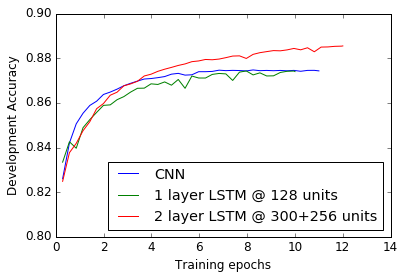

In [60]:
for curve in curves.values():
    cname, cpoints = curve
    plt.plot([p[1] / EPOCH_STEPS for p in cpoints], [p[2] for p in cpoints],
            label=cname)
    

plt.xlabel("Training epochs", **font)
plt.ylabel("Development Accuracy", **font)
plt.ylim([0.80, 0.90])
plt.legend(loc='lower right')
plt.savefig(os.path.join(plot_root, 'cnn_vs_lstm.eps'))